# 1. PROJECT SETUP & DATA LOADING

In [1]:
# Install required packages for data analysis 
# Install visualization libraries
# Install scikit-learn for machine learning tasks
!pip install pandas numpy seaborn scikit-learn

In [1]:
# Import pandas for data manipulation
import pandas as pd

In [2]:
# Load the dataset from a URL or local path
# url = "https://github.com/PAIshanMadusha/car-crash-severity-prediction-model/blob/development/dataset/car_crash_train.csv"
# or
url = "..\\dataset\\car_crash_train.csv"
data = pd.read_csv(url, encoding="latin-1")

# 2. EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
# Display the first few rows of the dataset
data.head()

,Crash Speed (km/h),Impact Angle (degrees),Airbag Deployed,Seatbelt Used,Weather Conditions,Road Conditions,Crash Type,Vehicle Type,Vehicle Age (years),Brake Condition,Tire Condition,Driver Age,Driver Experience (years),Alcohol Level (BAC%),Distraction Level,Time of Day,Traffic Density,Visibility Distance (m),Severity
0,182,69,Yes,No,Clear,Dry,Rollover,Sedan,5,Good,Good,23,11,0.025314,NaN,Morning,Low,213,Minor Injury
1,192,73,Yes,No,Clear,Dry,Head-on,Truck,3,Good,Good,29,27,0.002372,Phone,Morning,Medium,426,Minor Injury
2,114,77,No,Yes,Clear,Dry,Head-on,Sedan,16,Good,Worn out,73,45,0.000483,NaN,Morning,Medium,175,Minor Injury
3,93,14,No,Yes,Clear,Dry,Rear-end,Truck,14,Worn out,Worn out,27,18,0.176578,NaN,Afternoon,Medium,82,Minor Injury
4,170,96,No,Yes,Clear,Dry,Side impact,SUV,15,Good,Good,70,27,0.065696,Other,Morning,Medium,96,Severe Injury


In [4]:
# Display the last few rows of the dataset
data.tail()

,Crash Speed (km/h),Impact Angle (degrees),Airbag Deployed,Seatbelt Used,Weather Conditions,Road Conditions,Crash Type,Vehicle Type,Vehicle Age (years),Brake Condition,Tire Condition,Driver Age,Driver Experience (years),Alcohol Level (BAC%),Distraction Level,Time of Day,Traffic Density,Visibility Distance (m),Severity
3995,36,13,Yes,Yes,Rain,Dry,Rear-end,SUV,8,Good,Good,61,17,0.035191,Phone,Night,Medium,485,Severe Injury
3996,29,67,Yes,Yes,Clear,Dry,Rear-end,Sedan,4,Worn out,Good,65,19,0.100765,NaN,Morning,Low,254,Severe Injury
3997,156,50,Yes,Yes,Rain,Dry,Head-on,SUV,4,Worn out,Worn out,63,35,0.007323,NaN,Night,High,409,Minor Injury
3998,143,23,No,Yes,Clear,Dry,Rear-end,Sedan,5,Worn out,Good,42,26,0.103523,Other,Night,Medium,374,Minor Injury
3999,128,115,Yes,Yes,Rain,Dry,Head-on,SUV,11,Good,Good,67,4,0.051655,Other,Afternoon,Medium,395,Minor Injury


In [5]:
# Display the shape of the dataset(number of rows and columns)
data.shape

(4000, 19)

In [6]:
# Display the count of non-null entries in each column
data.count()

Crash Speed (km/h)           4000
Impact Angle (degrees)       4000
Airbag Deployed              4000
Seatbelt Used                4000
Weather Conditions           4000
Road Conditions              4000
Crash Type                   4000
Vehicle Type                 4000
Vehicle Age (years)          4000
Brake Condition              4000
Tire Condition               4000
Driver Age                   4000
Driver Experience (years)    4000
Alcohol Level (BAC%)         4000
Distraction Level            1640
Time of Day                  4000
Traffic Density              4000
Visibility Distance (m)      4000
Severity                     4000
dtype: int64

In [7]:
# Display summary information about the dataset
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crash Speed (km/h)         4000 non-null   int64  
 1   Impact Angle (degrees)     4000 non-null   int64  
 2   Airbag Deployed            4000 non-null   str    
 3   Seatbelt Used              4000 non-null   str    
 4   Weather Conditions         4000 non-null   str    
 5   Road Conditions            4000 non-null   str    
 6   Crash Type                 4000 non-null   str    
 7   Vehicle Type               4000 non-null   str    
 8   Vehicle Age (years)        4000 non-null   int64  
 9   Brake Condition            4000 non-null   str    
 10  Tire Condition             4000 non-null   str    
 11  Driver Age                 4000 non-null   int64  
 12  Driver Experience (years)  4000 non-null   int64  
 13  Alcohol Level (BAC%)       4000 non-null   float64
 14  Dis

In [8]:
# Statistical summary for numerical features
data.describe()

,Crash Speed (km/h),Impact Angle (degrees),Vehicle Age (years),Driver Age,Driver Experience (years),Alcohol Level (BAC%),Visibility Distance (m)
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,110.999750,89.979750,9.445500,48.698750,24.723000,0.101216,247.583500
std,52.227839,51.301514,5.718147,17.815972,14.211818,0.057820,143.478155
min,20.000000,0.000000,0.000000,18.000000,0.000000,0.000054,10.000000
25%,66.000000,45.000000,5.000000,34.000000,13.000000,0.050630,120.000000
50%,112.000000,89.500000,9.000000,49.000000,25.000000,0.101574,244.000000
75%,157.000000,134.000000,14.000000,64.000000,37.000000,0.151783,372.000000
max,199.000000,179.000000,19.000000,79.000000,49.000000,0.199936,499.000000


# 3. EDA VISUALIZATIONS & INSIGHTS

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#### MISSING VALUES ANALYSIS

In [11]:
# Missing values analysis 
missing_values = data.isnull().sum()
# Get percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("\n", missing_df)


                Column  Missing_Count  Missing_Percentage
14  Distraction Level           2360                59.0


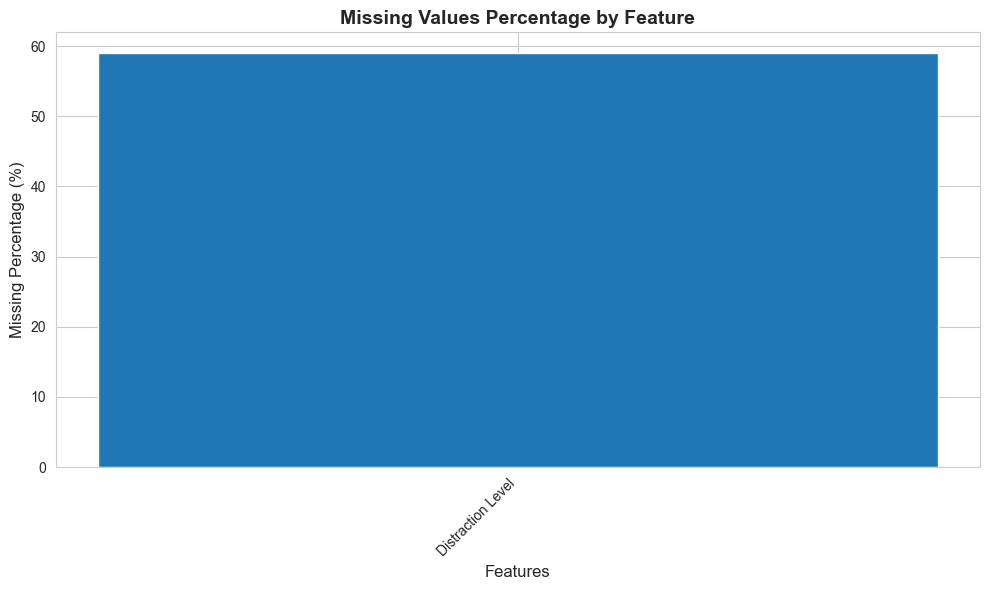

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_df['Column'], missing_df['Missing_Percentage'])
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### TARGET VARIABLE ANALYSIS (Severity)

In [13]:
# Analyze the target variable 'Severity'
severity_counts = data['Severity'].value_counts()

# Display severity distribution
print("\nSeverity Distribution:")
print(severity_counts)

# Display severity percentages
print("\nSeverity Percentages:")
print(data['Severity'].value_counts(normalize=True) * 100)


Severity Distribution:
Severity
Minor Injury     2756
Severe Injury    1038
Fatal             206
Name: count, dtype: int64

Severity Percentages:
Severity
Minor Injury     68.90
Severe Injury    25.95
Fatal             5.15
Name: proportion, dtype: float64


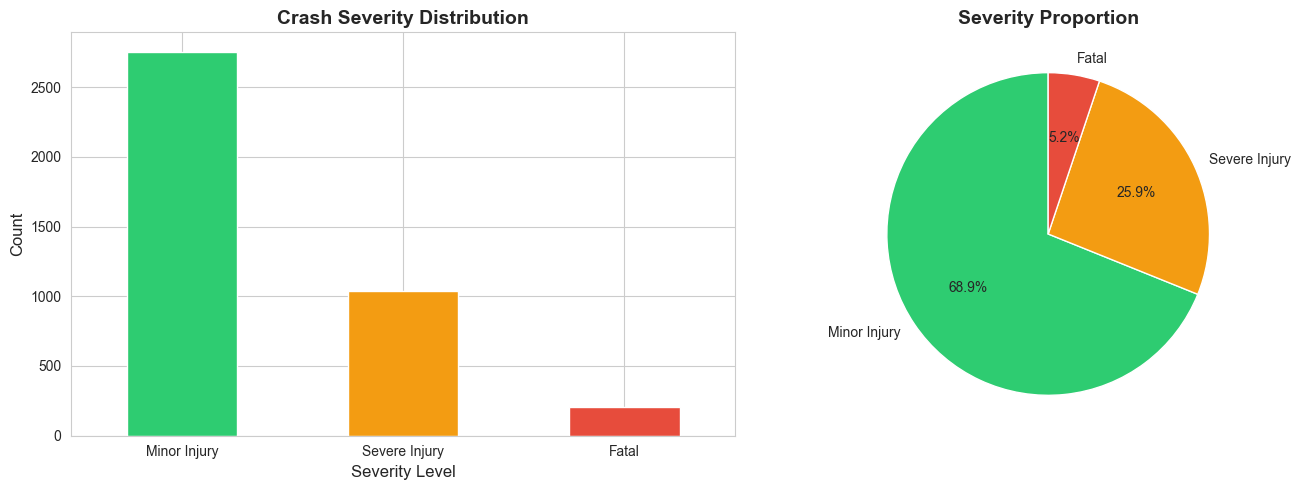

In [14]:
# Visualize severity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot for severity distribution
severity_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0].set_title('Crash Severity Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Severity Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Pie chart for severity proportion
axes[1].pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', 
            colors=['#2ecc71', '#f39c12', '#e74c3c'], startangle=90)
axes[1].set_title('Severity Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### NUMERICAL FEATURES ANALYSIS

In [15]:
# List of numerical columns for further analysis
numerical_cols = ['Crash Speed (km/h)', 'Impact Angle (degrees)', 
                  'Vehicle Age (years)', 'Driver Age', 
                  'Driver Experience (years)', 'Alcohol Level (BAC%)', 
                  'Visibility Distance (m)']

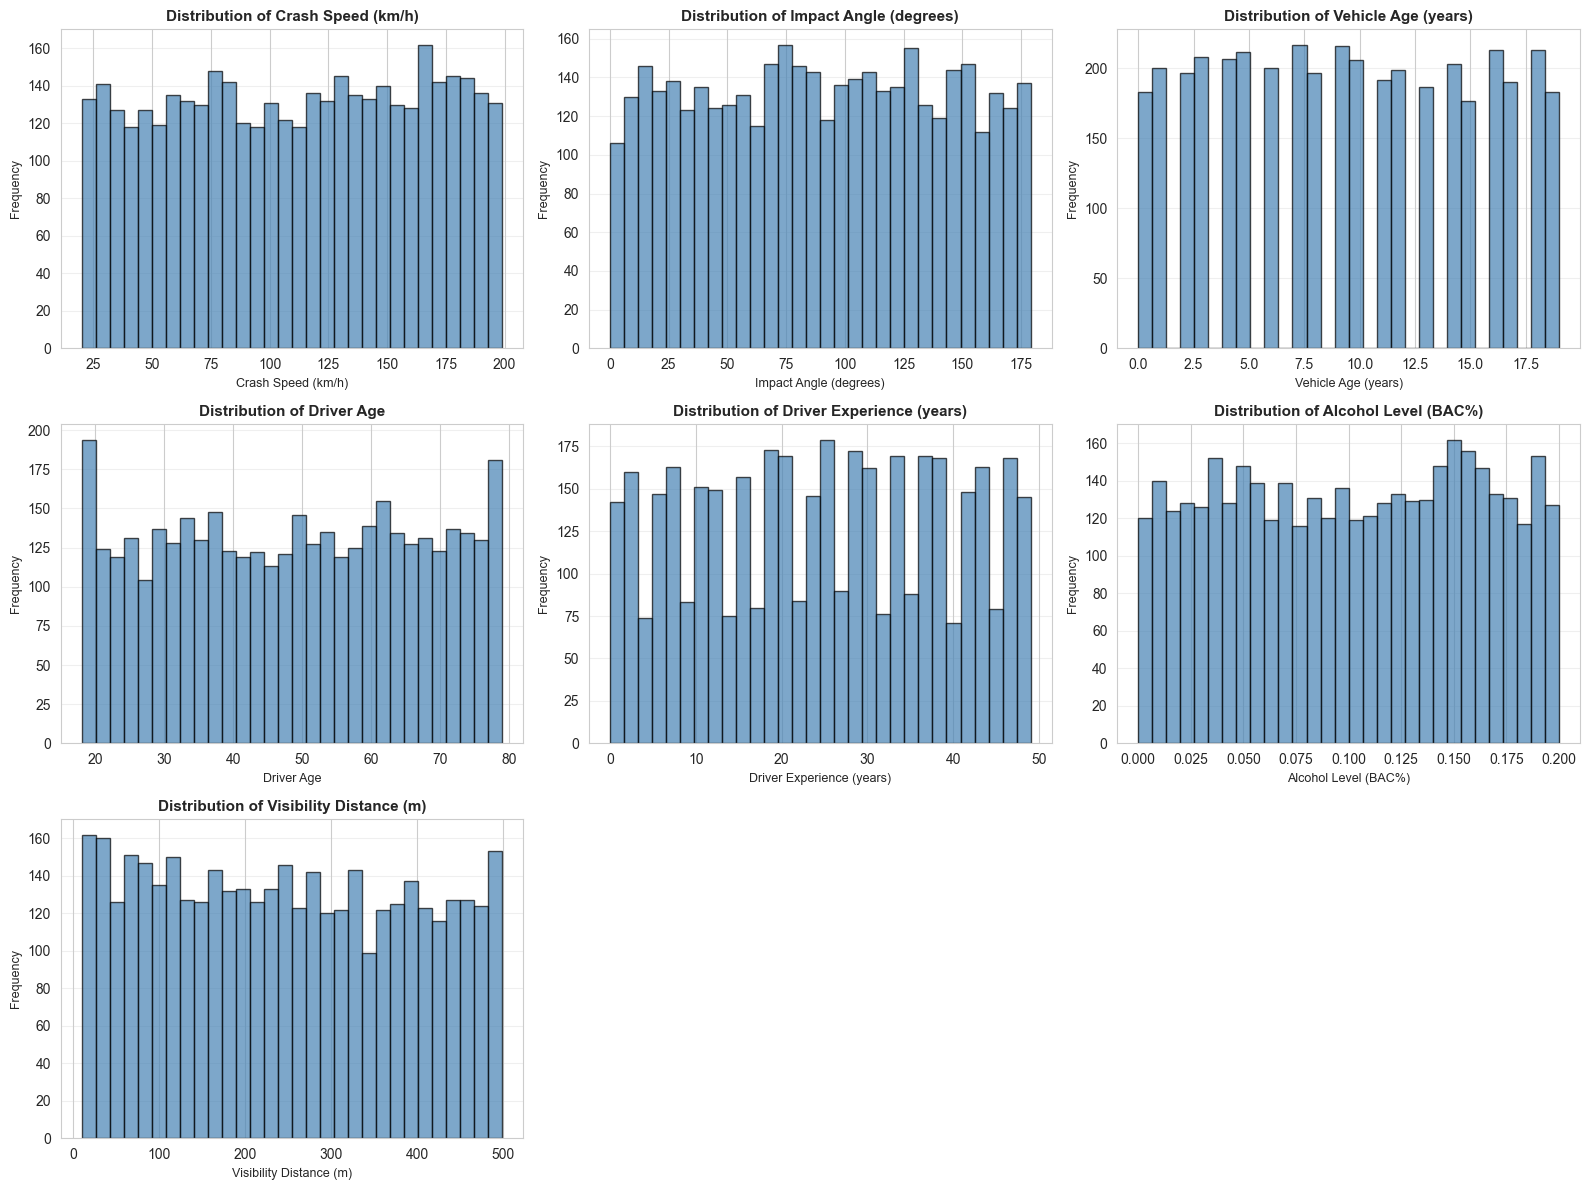

In [16]:
# Distribution plots to visualize spread of numerical features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

# Plot histograms for each numerical column
for idx, col in enumerate(numerical_cols):
    axes[idx].hist(data[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

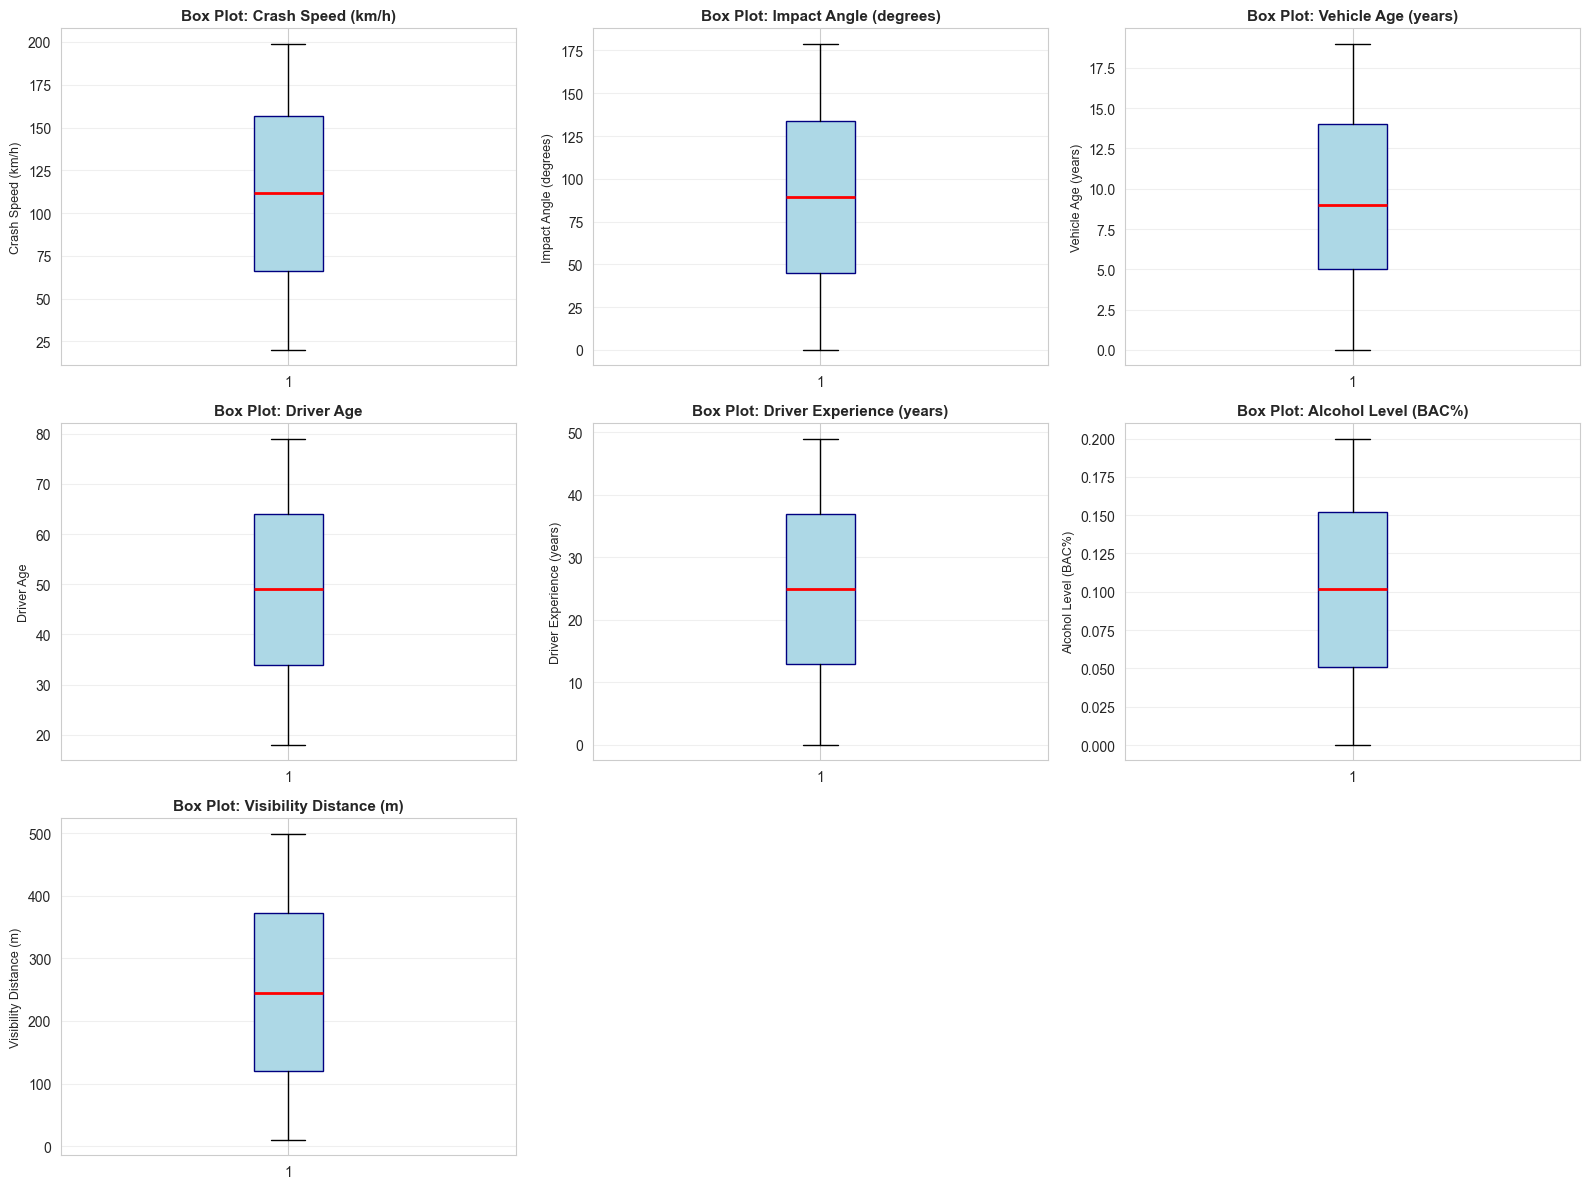

In [17]:
# Box plots to detect outliers
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

# Plot box plots for each numerical column
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(data[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='navy'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

#### CATEGORICAL FEATURES ANALYSIS

In [28]:
# List of categorical columns for further analysis
categorical_cols = ['Airbag Deployed', 'Seatbelt Used', 'Weather Conditions', 
                    'Road Conditions', 'Crash Type', 'Vehicle Type', 
                    'Brake Condition', 'Tire Condition', 'Distraction Level',
                    'Time of Day', 'Traffic Density']

In [30]:
# Value counts for each categorical feature
for col in categorical_cols:
    print(f"\nCategory | Value Counts:")
    print(data[col].value_counts())
    print(f"Unique values: {data[col].nunique()}")


Category | Value Counts:
Airbag Deployed
Yes    2817
No     1183
Name: count, dtype: int64
Unique values: 2

Category | Value Counts:
Seatbelt Used
Yes    3174
No      826
Name: count, dtype: int64
Unique values: 2

Category | Value Counts:
Weather Conditions
Clear    2345
Rain      846
Snow      421
Fog       388
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Road Conditions
Dry       2792
Wet        603
Icy        395
Uneven     210
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Crash Type
Side impact    1413
Rear-end       1175
Head-on        1020
Rollover        392
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Vehicle Type
Sedan         1644
SUV           1207
Truck          751
Motorcycle     398
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Brake Condition
Good        3369
Worn out     631
Name: count, dtype: int64
Unique values: 2

Category | Value Counts:
Tire Condition
Good        3225


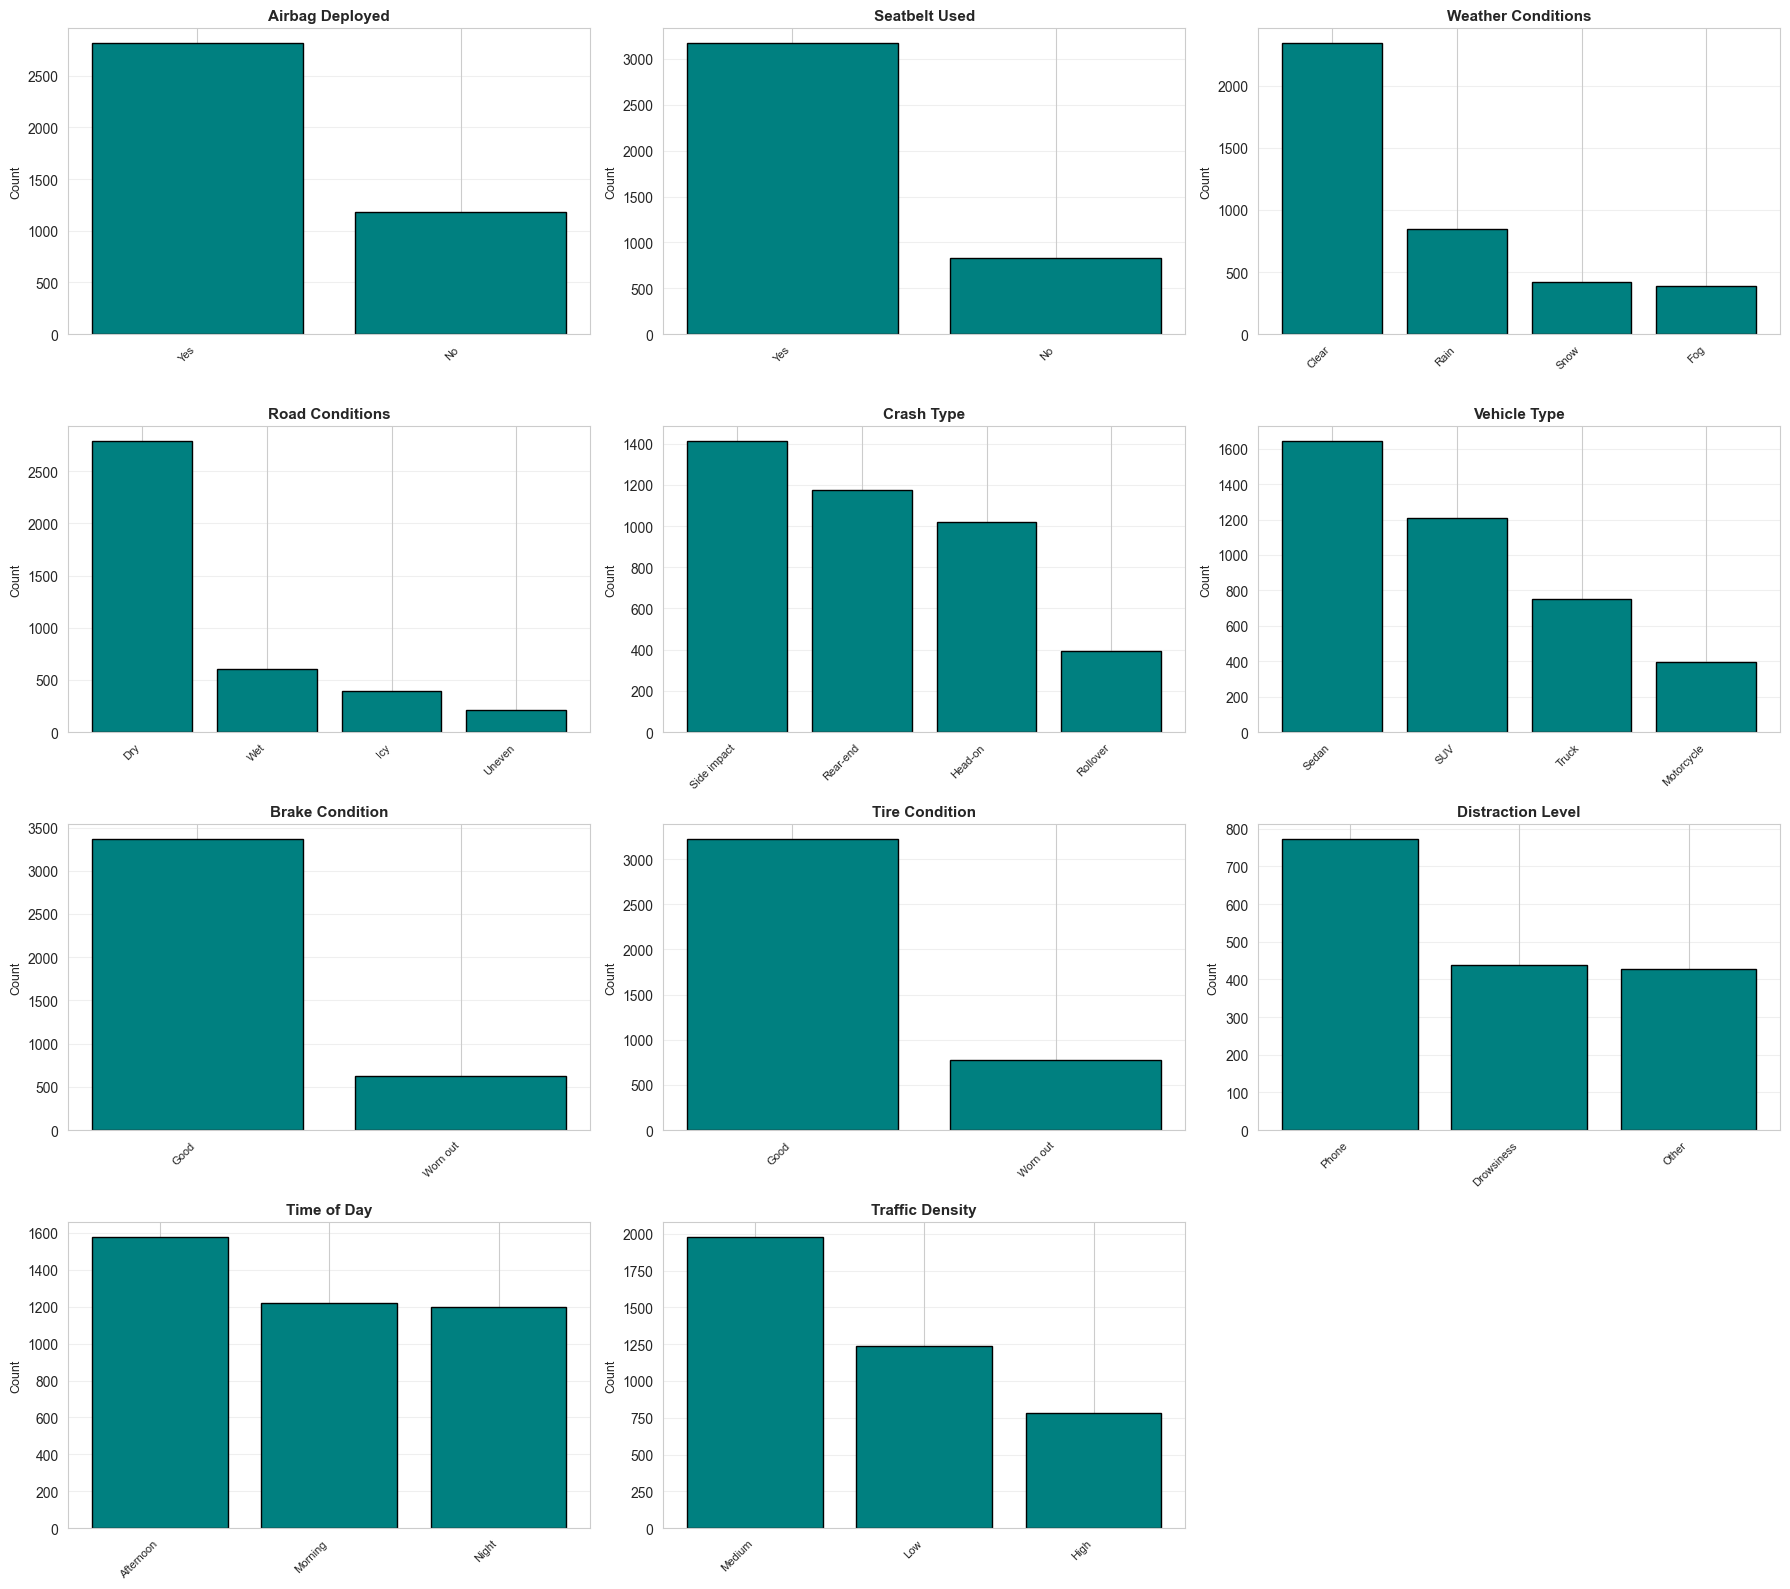

In [31]:
# Visualize distributions of categorical features
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

# Loop to plot bar charts for each categorical column
for idx, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='teal', edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
    axes[idx].set_ylabel('Count', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()